In [536]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import seaborn as sns

In [537]:
rho_T = 1e5
k_on1 = 1e5
k_off = 1e-4
t_0 = 1.44e4
q_on1 = 6.5e3
q_off = 4.7e-3
rho_N = 2.2e5
A_01 = 1e-6
mu = 1
T_01 = 4.15e-16
A_0 = (172635*A_01*1e-7)/1.66e-24
T_0 = (6e14*T_01*1e-7)/1.66e-9
N_0 = mu*T_0
k_on = k_on1*T_01
q_on = q_on1*T_01

In [538]:
def dimensional_model(t, z):
    
    dA = -k_on*z[0]*z[1] + k_off*z[2] - q_on*z[0]*z[3] + q_off*z[4]
    dT = -k_on*z[0]*z[1] + k_off*z[2]
    dTrA = k_on*z[0]*z[1] - k_off*z[2]
    dN = -q_on*z[0]*z[3] + q_off*z[4]
    dNrA = q_on*z[0]*z[3] - q_off*z[4]

    dz = [dA, dT, dTrA, dN, dNrA]

    return dz

In [539]:
A_01 = 1e-8
T_01 = 4.15e-16
A_0 = (172635*A_01*1e-7)/1.66e-24
T_0 = (6e14*T_01*1e-7)/1.66e-9
N_0 = 10*T_0
z_0 = [A_0, rho_T*T_0, 0, rho_N*N_0, 0]
k_on = k_on1*A_01
q_on = q_on1*A_01

t= np.geomspace(0.000000000001, t_0, 15000)
t_span = [0.000000000001, t_0]


z = solve_ivp(dimensional_model, t_span, z_0, method = 'Radau', t_eval = t)

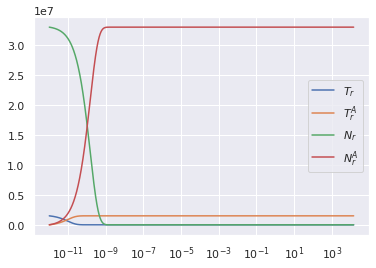

In [540]:
T = z.y[1]
Tr = z.y[2]
N = z.y[3]
Nr = z.y[4]
A = z.y[0]

sns.set_theme()

#plt.semilogx(t, A, label = 'A')
plt.semilogx(t, T, label = r'$T_r$')
plt.semilogx(t, Tr, label = r'$T_r^A$')
plt.semilogx(t, N, label = r'$N_r$')
plt.semilogx(t, Nr, label = r'$N_r^A$')
plt.legend(loc='best')
plt.show()

In [541]:
# dimensional params
rho_T = 1e5
k_on1 = 1e5
k_off = 1e-4
t_0 = 1.44e4
q_on1 = 6.5e3
q_off = 4.7e-3
rho_N = 2.2e5
A_01 = 1e-9
mu = 20
T_01 = 4.15e-16
A_0 = (172635*A_01*1e-7)/1.66e-24
T_0 = (6e14*T_01*1e-7)/1.66e-9
N_0 = mu*T_0
k_on = k_on1*T_01
q_on = q_on1*T_01


# params
alpha_1 = k_on*rho_T*T_0*t_0
alpha_2 = k_off*t_0
n_1 = q_on*t_0*rho_N*N_0
n_2 = q_off*t_0
gamma_T = (rho_T*T_0/A_0)
gamma_N = (rho_N*N_0/A_0)

z_0 = [1, 1, 0 ,1, 0]

In [542]:
def model1(t, z):

    dA = -alpha_1*z[0]*z[1] + gamma_T*alpha_2*z[2] - n_1*z[0]*z[3] + gamma_N*n_2*z[4]
    dTr = (-alpha_1/gamma_T)*z[0]*z[1] + alpha_2*z[2]
    dTrA = (alpha_1/gamma_T)*z[0]*z[1] - alpha_2*z[2]
    dNr = (-n_1/gamma_N)*z[0]*z[3] + n_2*z[4]
    dNrA = (n_1/gamma_N)*z[0]*z[3] - n_2*z[4]
    dz = [dA, dTr, dTrA, dNr, dNrA]

    return dz

In [543]:
t= np.geomspace(0.000000000001, 1, 15000)
t_span = [0.000000000001, 1]


z = solve_ivp(model1, t_span, z_0, method = 'Radau', t_eval = t)

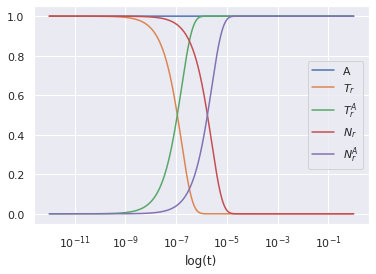

In [544]:
Tr = z.y[1]
TrA = z.y[2]
Nr = z.y[3]
NrA = z.y[4]
A = z.y[0]

sns.set_theme()

plt.semilogx(t, A, label = 'A')
plt.semilogx(t, Tr, label = r'$T_r$')
plt.semilogx(t, TrA, label = r'$T_r^A$')
plt.semilogx(t, Nr, label = r'$N_r$')
plt.semilogx(t, NrA, label = r'$N_r^A$')
plt.legend(loc='best')
plt.xlabel('log(t)')
plt.show()